In [34]:
import pandas as pd
import numpy as np
import glob

# GSDC Raw Data Overview

In [35]:
glob.glob("./data/raw_data/*")

['./data/raw_data/all_compounds_screened.csv',
 './data/raw_data/GDSC2_drug_dose_cellines_IC50s.xlsx',
 './data/raw_data/cellines_rnaseq_all_20220624',
 './data/raw_data/celline_SNP6_cnv_gistics_20191101',
 './data/raw_data/all_cellines_screened.xlsx',
 './data/raw_data/cellines_rnaseq_all_20220624.zip',
 './data/raw_data/mutations_all_20230202.csv',
 './data/raw_data/mutations_summary_20230202.csv',
 './data/raw_data/cellines_mutations_summary_20230202.zip',
 './data/raw_data/celline_SNP6_cnv_gistics_20191101.zip',
 './data/raw_data/drug_info.csv',
 './data/raw_data/cellines_mutations_all_20230202.zip']

In [36]:
all_compounds_screened = pd.read_csv("./data/raw_data/all_compounds_screened.csv")
all_cellines_screened = pd.read_excel("./data/raw_data/all_cellines_screened.xlsx", sheet_name=0)
all_experiment = pd.read_excel("./data/raw_data/GDSC2_drug_dose_cellines_IC50s.xlsx")

/Users/sunzehui/miniconda3/envs/tf/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [37]:
# 选取有测序结果和甲基化数据等数据的细胞系
filtered_celline = all_cellines_screened.loc[
    (all_cellines_screened['Whole Exome Sequencing (WES)'] == "Y") &
    (all_cellines_screened['Methylation'] == "Y") &
    (all_cellines_screened['Gene Expression'] == "Y") &
    (all_cellines_screened['Copy Number Alterations (CNA)'] == "Y") &
    (all_cellines_screened['Drug\nResponse'] == "Y")
]
filtered_celline.head()

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [38]:
filtered_celline.head()

,Sample Name,COSMIC identifier,Whole Exome Sequencing (WES),Copy Number Alterations (CNA),Gene Expression,Methylation,Drug\nResponse,GDSC\nTissue descriptor 1,GDSC\nTissue\ndescriptor 2,Cancer Type\n(matching TCGA label),Microsatellite \ninstability Status (MSI),Screen Medium,Growth Properties
0,A253,906794.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,NaN,MSS/MSI-L,D/F12,Adherent
1,BB30-HNC,753531.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
2,BB49-HNC,753532.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
3,BHY,753535.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent
4,BICR10,1290724.0,Y,Y,Y,Y,Y,aero_dig_tract,head and neck,HNSC,MSS/MSI-L,D/F12,Adherent


In [39]:
a = set(all_experiment['CELL_LINE_NAME'])
b = set(filtered_celline['Sample Name'])
print(f"experiment sheet includes {a.__len__()} unqiue cellines")
print(f"all_celline sheet includes {b.__len__()} unique cellines")
celline_barcode = list(a.intersection(b))
print(f"two sheets have {celline_barcode.__len__()} overlapping cellines")

experiment sheet includes 969 unqiue cellines
all_celline sheet includes 928 unique cellines
two sheets have 870 overlapping cellines


In [40]:
filtered_experiment = all_experiment[all_experiment['CELL_LINE_NAME'].isin(celline_barcode)]
filtered_experiment.head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,401,18945558,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.462148,0.930105,0.088999,0.432482
1,GDSC2,401,18945796,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869447,0.614932,0.111423,-1.420322
2,GDSC2,401,18946078,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360684,0.790953,0.142754,-0.599894
3,GDSC2,401,18946335,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.045014,0.592624,0.135642,-1.515791
4,GDSC2,401,18946617,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741620,0.733992,0.128066,-0.807038


# Single Celline Multi-omics data Overview

## Copy Number Variation

In [41]:
all_cna = pd.read_csv("./data/raw_data/celline_SNP6_cnv_gistics_20191101/cnv_abs_copy_number_picnic_20191101.csv", low_memory=False)
all_fpkm = pd.read_csv("./data/raw_data/cellines_rnaseq_all_20220624/rnaseq_fpkm_20220624.csv", low_memory=False)

In [42]:
# Doing some preprocessing
dat = all_cna.iloc[2:24505]
titile = all_cna.iloc[[0]]
df = pd.concat([titile, dat])
df = df.T.iloc[1:]
new_header = df.iloc[[0]].values
new_header = new_header.tolist()
new_header = new_header[0]
new_header[0] = "celline_barcode"
df.columns = new_header
df = df.iloc[1:].set_index("celline_barcode")

In [43]:
df = df.fillna(0.0)
cna_df = df

## Gene Expression (FPKM-based)

In [44]:
dat = all_fpkm.iloc[4:]
titile = all_fpkm.iloc[[0]]
df = pd.concat([titile, dat])
df = df.T.iloc[1:]
df
new_header = df.iloc[[0]].values
new_header = new_header.tolist()
new_header = new_header[0]
new_header[0] = "celline_barcode"
df.columns = new_header
df = df.iloc[1:].set_index("celline_barcode")

In [45]:
df = df.fillna(0.0)
fpkm_df = df

## Datasets Alignment

In [46]:
s1 = set(fpkm_df.index).intersection(celline_barcode)
s2 = set(cna_df.index).intersection(celline_barcode)
celline_barcode = list(s1.intersection(s2))
print(f"Two datasets have {len(celline_barcode)} common cellines")

Two datasets have 866 common cellines


In [47]:
common_genes = list(set(cna_df.columns).intersection(fpkm_df.columns))
print(f"Two datasets have {len(common_genes)} genes(features)")

Two datasets have 23914 genes(features)


In [48]:
fpkm_df.loc[celline_barcode].to_csv("./data/processed_data/fpkm.csv", sep='\t')
cna_df.loc[celline_barcode].to_csv("./data/processed_data/cna.csv", sep='\t')
fpkm_df = fpkm_df.loc[celline_barcode]
cna_df = cna_df.loc[celline_barcode]

In [49]:
filtered_experiment[filtered_experiment['CELL_LINE_NAME'].isin(celline_barcode)].head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC2,401,18945558,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-1.462148,0.930105,0.088999,0.432482
1,GDSC2,401,18945796,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-4.869447,0.614932,0.111423,-1.420322
2,GDSC2,401,18946078,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.360684,0.790953,0.142754,-0.599894
3,GDSC2,401,18946335,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-5.045014,0.592624,0.135642,-1.515791
4,GDSC2,401,18946617,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.0001,0.1,-3.741620,0.733992,0.128066,-0.807038


## GDSC Dataset

Filter dataset

In [50]:
# drug_info: https://www.cancerrxgene.org/downloads/drug_data
drug_df = pd.read_csv('./data/raw_data/drug_info.csv', sep=',')
drug_df.head()

,drug_id,drug_name,synonyms,pathway_name,targets,pubchem
0,1834,743380,-,Unclassified,-,-
1,1854,MN-64,-,WNT signaling,"TNKS1, TNKS2",2802462
2,1909,Venetoclax,"ABT-199, Veneclexta, GDC-0199",Apoptosis regulation,BCL2,49846579
3,1913,AGI-5198,IDH-C35,Metabolism,IDH1 (R132H),56645356
4,1915,AZD3759,-,EGFR signaling,EGFR,78209992


In [51]:
# pubchem_id exclude non-numeric rows
import re
nonnumber = re.compile(r'\D+')
pubchem_id = list(set(drug_df['pubchem']))
pubchem_id = [i.split(',')[0] if "," in i else i for i in pubchem_id]
pubchem_id = [i for i in pubchem_id if re.findall(pattern=nonnumber, string=i).__len__()==0]
drug_df = drug_df[drug_df['pubchem'].isin(pubchem_id)]

In [52]:
all_drug_in_experiment = list(set(all_experiment['DRUG_NAME']))
d = drug_df[drug_df['drug_name'].isin(all_drug_in_experiment)][['drug_name', 'pubchem']]

In [53]:
lookup_table = dict(zip(d['drug_name'], d['pubchem']))
all_experiment = all_experiment[all_experiment['DRUG_NAME'].isin(d['drug_name'])]
all_experiment['PUBCHEM_ID'] = [lookup_table[i] for i in all_experiment['DRUG_NAME']]


In [54]:
all_experiment = all_experiment[all_experiment['CELL_LINE_NAME'].isin(celline_barcode)]
all_experiment.reset_index(inplace = True)
all_experiment.drop(columns = "index", inplace = True)
all_experiment

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE,PUBCHEM_ID
0,GDSC2,401,18945558,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-1.462148,0.930105,0.088999,0.432482,24360
1,GDSC2,401,18945796,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-4.869447,0.614932,0.111423,-1.420322,24360
2,GDSC2,401,18946078,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-3.360684,0.790953,0.142754,-0.599894,24360
3,GDSC2,401,18946335,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-5.045014,0.592624,0.135642,-1.515791,24360
4,GDSC2,401,18946617,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,DNA replication,1046,Y,0.000100,0.1,-3.741620,0.733992,0.128066,-0.807038,24360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145002,GDSC2,401,19186874,1659818,MM1S,SIDM01265,MM,2359,GSK2830371,WIP1,Other,1094,Y,0.010005,10.0,4.290123,0.991533,0.020244,-0.962882,70983932
145003,GDSC2,401,19187483,1659928,SNU-175,SIDM00216,COREAD,2359,GSK2830371,WIP1,Other,1094,Y,0.010005,10.0,5.423870,0.985066,0.032710,0.001082,70983932
145004,GDSC2,401,19187936,1660034,SNU-407,SIDM00214,COREAD,2359,GSK2830371,WIP1,Other,1094,Y,0.010005,10.0,5.042005,0.970009,0.026729,-0.323597,70983932
145005,GDSC2,401,19188194,1660035,SNU-61,SIDM00194,COREAD,2359,GSK2830371,WIP1,Other,1094,Y,0.010005,10.0,6.130028,0.986298,0.027488,0.601490,70983932


In [55]:
all_experiment.to_csv("./data/processed_data/expriment.csv", sep="\t", index = None)

## Response and Pubchem ID troubleshooting

In [56]:
import pubchempy as pcp
df = pcp.get_properties(properties=['canonical_smiles'], identifier=pubchem_id,
                        namespace='cid', )
df = pd.DataFrame(df)
df[['CID']]=df[['CID']].astype(str)
df.to_csv("./data/processed_data/pubchem_id-SMILES.csv", sep='\t')
lookup_table_cid_smiles = dict(zip(df['CID'], df['CanonicalSMILES']))

In [57]:
all_experiment = all_experiment[all_experiment['PUBCHEM_ID'].isin(pubchem_id)]
all_experiment['SMILES']=[lookup_table_cid_smiles[i] for i in all_experiment['PUBCHEM_ID']]

In [58]:
all_experiment.head(5)

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,...,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE,PUBCHEM_ID,SMILES
0,GDSC2,401,18945558,683667,PFSK-1,SIDM01132,MB,1003,Camptothecin,TOP1,...,1046,Y,0.0001,0.1,-1.462148,0.930105,0.088999,0.432482,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1,GDSC2,401,18945796,684052,A673,SIDM00848,UNCLASSIFIED,1003,Camptothecin,TOP1,...,1046,Y,0.0001,0.1,-4.869447,0.614932,0.111423,-1.420322,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2,GDSC2,401,18946078,684057,ES5,SIDM00263,UNCLASSIFIED,1003,Camptothecin,TOP1,...,1046,Y,0.0001,0.1,-3.360684,0.790953,0.142754,-0.599894,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3,GDSC2,401,18946335,684059,ES7,SIDM00269,UNCLASSIFIED,1003,Camptothecin,TOP1,...,1046,Y,0.0001,0.1,-5.045014,0.592624,0.135642,-1.515791,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4,GDSC2,401,18946617,684062,EW-11,SIDM00203,UNCLASSIFIED,1003,Camptothecin,TOP1,...,1046,Y,0.0001,0.1,-3.741620,0.733992,0.128066,-0.807038,24360,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...


In [59]:
sample_barcode = [f"{i[0]}_{i[1]}" for i in zip(all_experiment['CELL_LINE_NAME'], all_experiment['PUBCHEM_ID'])]

In [60]:
response = pd.DataFrame()
response['sample_barcode'] = sample_barcode
response['LN_IC50'] = all_experiment['LN_IC50']
response.reset_index(drop=True, inplace=True)

**exclude outliers**

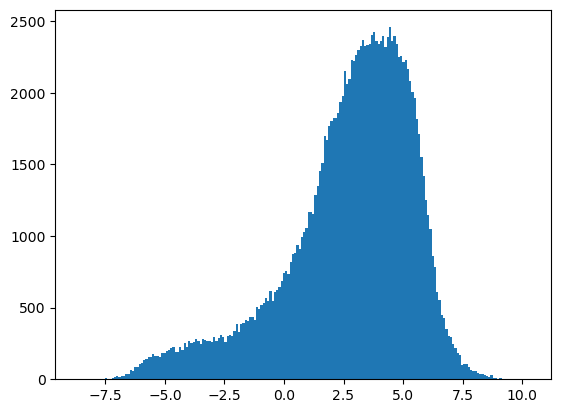

In [61]:
from matplotlib import pyplot
ln_ic50 = all_experiment['LN_IC50'].values
df = pd.DataFrame(ln_ic50)
pyplot.hist(df, bins=200)

lower, median, upper = df.quantile([0.25,0.5,0.75]).values
IQR = upper - lower
lower_limit = lower - 1.5*IQR
upper_limit = upper + 1.5*IQR

all_experiment.loc[(all_experiment['LN_IC50'] < upper_limit.data) &
                   (all_experiment['LN_IC50'] > lower_limit.data)]

all_experiment.reset_index(drop=True, inplace=True)

In [62]:
response.to_csv('./data/processed_data/response.csv', sep='\t', index=None)
all_experiment.to_csv('./data/processed_data/expriment.csv', sep='\t', index=None)

## Drug Feature Extraction using beta-VAE

In [63]:
import pandas as pd
from os.path import realpath
import pandas as pd
from keras.models import load_model
import ast
import pandas as pd
import numpy as np
from rdkit import Chem, RDLogger
from rdkit.Chem import BondType

RDLogger.DisableLog("rdApp.*")

SMILE_CHARSET = '["C", "B", "F", "I", "H", "O", "N", "S", "P", "Cl", "Br"]'

bond_mapping = {"SINGLE": 0, "DOUBLE": 1, "TRIPLE": 2, "AROMATIC": 3}
bond_mapping.update(
    {0: BondType.SINGLE, 1: BondType.DOUBLE, 2: BondType.TRIPLE, 3: BondType.AROMATIC}
)
SMILE_CHARSET = ast.literal_eval(SMILE_CHARSET)

SMILE_to_index = dict((c, i) for i, c in enumerate(SMILE_CHARSET))
index_to_SMILE = dict((i, c) for i, c in enumerate(SMILE_CHARSET))
atom_mapping = dict(SMILE_to_index)
atom_mapping.update(index_to_SMILE)

BATCH_SIZE = 100
EPOCHS = 10

VAE_LR = 5e-4
NUM_ATOMS = 120  # Maximum number of atoms

ATOM_DIM = len(SMILE_CHARSET)  # Number of atom types
BOND_DIM = 4 + 1  # Number of bond types
LATENT_DIM = 435  # Size of the latent space


def smiles_to_graph(smiles):
    # Converts SMILES to molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Initialize adjacency and feature tensor
    adjacency = np.zeros((BOND_DIM, NUM_ATOMS, NUM_ATOMS), "float32")
    features = np.zeros((NUM_ATOMS, ATOM_DIM), "float32")

    # loop over each atom in molecule
    # Ignore Pt Atom
    for atom in molecule.GetAtoms():
        if(atom.GetSymbol() == "Pt"):
            continue
        i = atom.GetIdx()
        atom_type = atom_mapping[atom.GetSymbol()]
        features[i] = np.eye(ATOM_DIM)[atom_type]
        # loop over one-hop neighbors
        for neighbor in atom.GetNeighbors():
            j = neighbor.GetIdx()
            bond = molecule.GetBondBetweenAtoms(i, j)
            bond_type_idx = bond_mapping[bond.GetBondType().name]
            adjacency[bond_type_idx, [i, j], [j, i]] = 1

    # Where no bond, add 1 to last channel (indicating "non-bond")
    # Notice: channels-first
    adjacency[-1, np.sum(adjacency, axis=0) == 0] = 1

    # Where no atom, add 1 to last column (indicating "non-atom")
    features[np.where(np.sum(features, axis=1) == 0)[0], -1] = 1

    return adjacency, features


def graph_to_molecule(graph):
    # Unpack graph
    adjacency, features = graph

    # RWMol is a molecule object intended to be edited
    molecule = Chem.RWMol()

    # Remove "no atoms" & atoms with no bonds
    keep_idx = np.where(
        (np.argmax(features, axis=1) != ATOM_DIM - 1)
        & (np.sum(adjacency[:-1], axis=(0, 1)) != 0)
    )[0]
    features = features[keep_idx]
    adjacency = adjacency[:, keep_idx, :][:, :, keep_idx]

    # Add atoms to molecule
    for atom_type_idx in np.argmax(features, axis=1):
        atom = Chem.Atom(atom_mapping[atom_type_idx])
        _ = molecule.AddAtom(atom)

    # Add bonds between atoms in molecule; based on the upper triangles
    # of the [symmetric] adjacency tensor
    (bonds_ij, atoms_i, atoms_j) = np.where(np.triu(adjacency) == 1)
    for (bond_ij, atom_i, atom_j) in zip(bonds_ij, atoms_i, atoms_j):
        if atom_i == atom_j or bond_ij == BOND_DIM - 1:
            continue
        bond_type = bond_mapping[bond_ij]
        molecule.AddBond(int(atom_i), int(atom_j), bond_type)

    # Sanitize the molecule; for more information on sanitization, see
    # https://www.rdkit.org/docs/RDKit_Book.html#molecular-sanitization
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    # Let's be strict. If sanitization fails, return None
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        return None

    return molecule


# 注：min-Max归一化需要在分割完训练集和测试集和Validation set之后再进行

# Cached_data
cached_data = {}

# Path Define
cna_path = realpath("data/processed_data/cna.csv")
experiment_path = realpath("data/processed_data/experiment.csv")
fpkm_path = realpath("data/processed_data/fpkm.csv")
SMILES_path = realpath("data/processed_data/pubchem_id-SMILES.csv")

drug_AdjacencyTensor = []
drug_FeatureTensor = []

df = pd.read_csv(SMILES_path, sep='\t')
for i in df["CanonicalSMILES"]:
    _ad, _fe = smiles_to_graph(i)
    drug_AdjacencyTensor.append(_ad)
    drug_FeatureTensor.append(_fe)

drug_AdjacencyTensor = np.array(drug_AdjacencyTensor)
drug_FeatureTensor = np.array(drug_FeatureTensor)

vae = load_model("./model/drug-molecule-generation-with-VAE",
               compile=False)

z_mean, _ = vae.encoder.predict([drug_AdjacencyTensor[:1000], drug_FeatureTensor[:1000]])

6/6 [==============================] - 0s 3ms/step


2023-03-03 22:21:09.315897: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [64]:
drug_feature_df = pd.DataFrame(data = z_mean, index=df['CID'])

In [65]:
drug_feature_df.head(5) # 435-dim vector

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
CID,,,,,,,,,,,,,,,,,,,,,
71268957,0.023981,0.097338,-0.211344,-0.024589,0.004948,-0.009020,0.158380,-0.035756,-0.452018,0.041208,...,0.021325,-0.166603,-0.248539,-0.040099,0.021418,-0.128903,0.127213,-0.216178,0.120799,-0.067190
2314623,0.007296,0.041999,-0.154619,0.081393,-0.098541,0.037186,0.172606,-0.067591,-0.466547,0.158950,...,-0.037435,-0.164323,-0.296949,-0.056691,0.013266,-0.119635,0.071646,-0.232261,0.130636,-0.083143
25227436,0.023525,0.079775,-0.147905,0.026937,-0.019618,-0.012124,0.139632,-0.029367,-0.368975,0.073377,...,0.008239,-0.125647,-0.223009,-0.048088,0.013960,-0.099793,0.092155,-0.176225,0.095592,-0.060700
1401,0.032719,0.094512,-0.187366,-0.007019,0.002798,-0.011483,0.144681,-0.029853,-0.411385,0.047024,...,0.018934,-0.142568,-0.232523,-0.038425,0.015611,-0.112589,0.112600,-0.194852,0.111302,-0.060709
6450551,0.001371,0.075073,-0.171491,0.023981,-0.046388,0.004973,0.172086,-0.050759,-0.447441,0.090971,...,0.006356,-0.163558,-0.258670,-0.056590,0.016743,-0.126641,0.109433,-0.224895,0.117946,-0.073409


## CNA 和 Gene-Expression dimension reduction

In [66]:
print(cna_df.shape)
cna_df.head()

(866, 24502)


,A1BG,A1CF,A2M,A2ML1,A2ML1-AS1,A2ML1-AS2,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
celline_barcode,,,,,,,,,,,,,,,,,,,,,
SK-N-FI,1.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0
EM-2,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,...,4.0,1.0,1.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0
NOS-1,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0
CAL-120,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,6.0,2.0,...,5.0,2.0,2.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0
HEL,3.0,2.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,...,2.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0


In [67]:
print(fpkm_df.shape)
fpkm_df.head()

(866, 37602)


,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,RSKR,SHLD3,ATP6V1FNB
celline_barcode,,,,,,,,,,,,,,,,,,,,,
SK-N-FI,0.19,0.75,0.0,0.09,1.26,0.0,0.0,0.52,0.02,0.15,...,0.79,0.0,7.62,102.1,0.0,6.24,4.82,3.71,2.98,0.76
EM-2,0.21,1.65,0.0,0.0,0.03,0.0,0.0,0.02,0.0,0.0,...,2.8,0.0,2.53,44.75,0.0,3.43,8.67,9.83,3.62,0.14
NOS-1,0.31,5.41,0.0,13.18,0.16,0.01,0.0,0.12,0.0,0.15,...,7.99,0.0,11.83,42.87,0.0,16.45,33.11,7.16,3.47,0.57
CAL-120,0.51,2.95,0.01,0.09,0.38,0.01,0.0,0.38,0.0,0.12,...,5.93,0.0,5.97,30.29,0.0,3.6,12.47,0.72,3.29,0.18
HEL,0.12,0.67,0.0,0.2,0.05,0.2,0.04,0.53,0.42,0.07,...,0.02,0.0,2.54,57.52,0.0,3.99,10.23,10.47,1.22,1.18


**CNA and FPKM data integration using SNF**

SNFtool: https://doi.org/10.1038/nmeth.2810

R code is in current folder/SNL_integration.R

In [68]:
!R CMD BATCH ./SNL_integration.R

In [69]:
similarity_df = pd.read_csv("./data/processed_data/simlilarity_matrix.csv")

In [70]:
similarity_df.drop(columns=['Unnamed: 0'], inplace=True)
similarity_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V857,V858,V859,V860,V861,V862,V863,V864,V865,V866
0,0.565651,0.001043,0.000867,0.000815,0.000957,0.000724,0.000791,0.000746,0.000955,0.000833,...,0.001112,0.001226,0.001261,0.000984,0.000771,0.001014,0.000863,0.000786,0.000860,0.000769
1,0.001043,0.563758,0.000878,0.000870,0.002234,0.000810,0.000908,0.000818,0.001380,0.000825,...,0.001727,0.001068,0.001004,0.001163,0.000897,0.001030,0.000943,0.000931,0.000878,0.000880
2,0.000867,0.000878,0.582838,0.001032,0.001050,0.001093,0.000887,0.001041,0.000887,0.001003,...,0.000816,0.000841,0.000923,0.000899,0.001099,0.000920,0.000937,0.000881,0.000917,0.000929
3,0.000815,0.000870,0.001032,0.570135,0.000980,0.001196,0.001075,0.001172,0.001005,0.001590,...,0.000837,0.000860,0.000880,0.001065,0.001191,0.000994,0.001179,0.000971,0.000963,0.001095
4,0.000957,0.002234,0.001050,0.000980,0.578585,0.000872,0.000852,0.000821,0.000975,0.000861,...,0.001109,0.001163,0.000936,0.001046,0.000899,0.001062,0.001119,0.000799,0.000820,0.000879


In [71]:
similarity_df.columns = cna_df.index

In [72]:
similarity_df.head() # 就是细胞的Genomic Profiles的特征向量
celline_feature = {}
for i, celline in enumerate(similarity_df.columns):
    celline_feature[celline] = np.array(similarity_df.iloc[i].values)

In [73]:
s = []
for i in response['sample_barcode']:
    celline_name, pubchem_id = i.split('_')
    celline_feature_array = celline_feature[celline_name]
    drug_feature_array = drug_feature_df.loc[int(pubchem_id)]
    combined_feature = np.hstack([celline_feature_array, drug_feature_array])
    s.append(combined_feature)
    

In [74]:
np.array(s).shape # 866+435=1301-dim vector

(145007, 1301)

In [75]:
np.save("./data/processed_data/all_feature", np.array(s))

In [76]:
import numpy as np
import pandas as pd

In [77]:
data = np.load('./data/processed_data/all_feature.npy')
response = pd.read_csv('./data/processed_data/response.csv', sep='\t')


In [78]:
import tensorflow as tf
from tensorflow.data import Dataset
from sklearn.preprocessing import MinMaxScaler

In [79]:
data

array([[ 0.0012468 ,  0.00109117,  0.00091766, ..., -0.2051767 ,
         0.1079938 , -0.07283862],
       [ 0.0011865 ,  0.00106873,  0.00097114, ..., -0.2051767 ,
         0.1079938 , -0.07283862],
       [ 0.00120214,  0.00110822,  0.00135228, ..., -0.2051767 ,
         0.1079938 , -0.07283862],
       ...,
       [ 0.00137266,  0.00121407,  0.00097779, ..., -0.20536007,
         0.1069904 , -0.06821173],
       [ 0.00081265,  0.00084827,  0.00098995, ..., -0.20536007,
         0.1069904 , -0.06821173],
       [ 0.00098986,  0.001156  ,  0.00090891, ..., -0.20536007,
         0.1069904 , -0.06821173]])

In [80]:
features = tf.constant(data)
labels = response['LN_IC50'].values


In [81]:
scaler = MinMaxScaler()
labels = labels.reshape(-1,1)
scaler.fit(labels)
labels = scaler.transform(labels)

In [82]:
labels

array([[0.38011973],
       [0.20013926],
       [0.27983519],
       ...,
       [0.72368233],
       [0.78115392],
       [0.7822757 ]])

In [83]:
labels.squeeze

<function ndarray.squeeze>

Other Method


In [84]:
from sklearn.model_selection import train_test_split
data = np.load('./data/processed_data/all_feature.npy')
response = pd.read_csv('./data/processed_data/response.csv', sep='\t')
#features = tf.constant(data)
labels = response['LN_IC50'].values
scaler = MinMaxScaler()
labels = labels.reshape(-1,1)
scaler.fit(labels)
labels = scaler.transform(labels)
#labels = np.squeeze(1)
#labels = tf.constant(labels)
# dataset = Dataset.from_tensors((features, labels))


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)


In [85]:
[i for i in y if i==3].__len__()

0

In [86]:
import tensorflow as tf
from tensorflow import keras
from keras.losses import MeanSquaredError, BinaryCrossentropy
from keras import Model
from keras.metrics import Accuracy, AUC
import pandas as pd
from keras.models import Sequential
from keras import layers
import numpy as np
from tensorflow.data import Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = np.load('./data/processed_data/all_feature.npy')
response = pd.read_csv('./data/processed_data/response.csv', sep='\t')
#features = tf.constant(data)
labels = response['LN_IC50'].values
scaler = MinMaxScaler()
labels = labels.reshape(-1,1)
scaler.fit(labels)
labels = scaler.transform(labels)
# labels = np.squeeze(1)
#labels = tf.constant(labels)
# dataset = Dataset.from_tensors((features, labels))

y = []
for i in labels:
    if (i[0]<=0.67):
        y.append(1)
    else:
        y.append(0)
labels = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, 
                                                    random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [88]:
from sklearn.metrics import f1_score, precision_score, recall_score
y_pred = clf.predict(X_test)
precision_score(y_test, y_pred)


0.8291972993248312

In [89]:
recall_score(y_test, y_pred)


0.9035411830101691